# Next Steps

Compare to Valance & Arousal, maybe present cluster info v V&A plane as it relates to mood? How do I do this lol

In [1]:
import pandas as pd
import numpy as np

In [6]:
# Read dataset
df = pd.read_csv("../data/song_properties_dataset.csv")

# Exploratory Data Analysis

In [7]:
df.head(10)

,id,genre,track_name,artist_name,danceability,valence,energy,tempo,loudness,speechiness,instrumentalness
0,6wN5nWLgjEGmPwozDh2jwM,acoustic,Kiss Me,Jason Walker,0.429,0.330,0.184,77.567,-9.731,0.0299,0.000000
1,5z1vCywwTJAP8qSkGJymFY,acoustic,Creep - Live,Korn,0.484,0.236,0.534,104.023,-8.156,0.1510,0.000000
2,1ZmbLKxfrWh2ejFjiZxZPW,acoustic,Better Off - Live From Spotify London,HAIM,0.510,0.419,0.702,119.296,-10.475,0.0296,0.003800
3,7noCkklUhEAoj8GJkbAuHq,acoustic,All of Me,Boyce Avenue,0.606,0.308,0.209,125.969,-10.273,0.0418,0.000000
4,6wDKGtbPpF9xPMRv7bswQN,acoustic,Dead Sea,The Lumineers,0.713,0.472,0.319,94.043,-11.077,0.0289,0.000079
5,7nnWIPM5hwE3DaUBkvOIpy,acoustic,Drive,Incubus,0.645,0.666,0.792,90.565,-6.862,0.1900,0.000000
6,2izoqbHZCGaoFOO8vcc1hK,acoustic,Boyfriend,Alex G,0.781,0.741,0.737,93.077,-12.636,0.0638,0.000037
7,0GNI8K3VATWBABQFAzBAYe,acoustic,Stay,Rihanna,0.621,0.125,0.310,111.893,-9.903,0.0308,0.000025
8,0VxFKXvKLjYWU7oPPMwzuN,acoustic,Somewhere Only We Know,Keane,0.457,0.389,0.646,172.257,-10.132,0.0379,0.010900
9,11ETYjIGagOXU1PtCmF3T2,acoustic,Stuck In The Moment,Justin Bieber,0.718,0.452,0.709,90.026,-11.566,0.2180,0.000162


In [8]:
import seaborn as sns; sns.set_theme()

<AxesSubplot:>

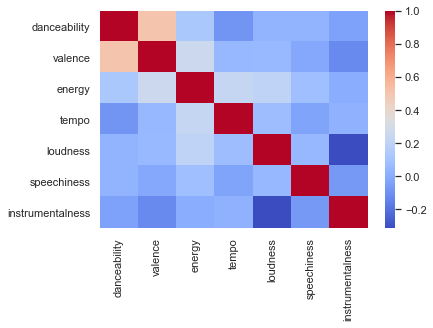

In [9]:
sns.heatmap(df.corr(), cmap = "coolwarm")

In [33]:
df.dtypes

id                   object
genre                object
track_name           object
artist_name          object
danceability        float64
valence             float64
energy              float64
tempo               float64
loudness            float64
speechiness         float64
instrumentalness    float64
artists_song         object
clusters              int64
dtype: object

In [35]:
df['genre'].values[0]

'acoustic'

In [40]:
df['artist_name'].values[0]

'Jason Walker'

In [10]:
df.dropna(inplace=True)

In [12]:
# Dropping unspecified artists 
df = df[df["artist_name"] != "['Unspecified']"]

In [13]:
# Filter out speeches, comedy routines, poems, etc.
# .66 as per suggested by Spotify
df = df[df["speechiness"] < 0.66]

# Preprocessing

In [14]:
# Drop duplicates
df.drop_duplicates(subset = "id", keep = "first", inplace = True)

# Drop song duplicates
def drop_duplicates(df):
    df['artists_song'] = df.apply(lambda row: row['artist_name']+row['track_name'],axis = 1)
    return df.drop_duplicates('artists_song')

track_df = drop_duplicates(df)
print("Are all songs unique: ",len(pd.unique(track_df.artists_song))==len(track_df))

Are all songs unique:  True


In [15]:
# Converting genres columns into a list
def genre_preprocess(df):
    '''
    Preprocess the genre data
    '''
    df['genres_list'] = df['genre'].apply(lambda x: x.split(" "))
    return df
track_df = genre_preprocess(track_df)
track_df['genres_list'].head()

0    [acoustic]
1    [acoustic]
2    [acoustic]
3    [acoustic]
4    [acoustic]
Name: genres_list, dtype: object

In [16]:
# Preporcessing new playlist
def playlist_preprocess(df):
    '''
    Preprocess imported playlist
    '''
    df = drop_duplicates(df)
    df = select_cols(df)
    df = genre_preprocess(df)

    return df

# Feature Engineering

In [18]:
from textblob import TextBlob

# Preparing for sentiment analysis, will devide by subjectivity (0,1) v polarity (-1,1)
def getSubjectivity(text):
  '''
  Getting the Subjectivity using TextBlob
  '''
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  '''
  Getting the Polarity using TextBlob
  '''
  return TextBlob(text).sentiment.polarity

def getAnalysis(score, task="polarity"):
  '''
  Categorizing the Polarity & Subjectivity score
  '''
  if task == "subjectivity":
    if score < 1/3:
      return "low"
    elif score > 1/3:
      return "high"
    else:
      return "medium"
  else:
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'

def sentiment_analysis(df, text_col):

  df['subjectivity'] = df[text_col].apply(getSubjectivity).apply(lambda x: getAnalysis(x,"subjectivity"))
  df['polarity'] = df[text_col].apply(getPolarity).apply(getAnalysis)
  return df

In [19]:
sentiment = sentiment_analysis(track_df, "track_name")
sentiment.head()

,id,genre,track_name,artist_name,danceability,valence,energy,tempo,loudness,speechiness,instrumentalness,artists_song,genres_list,subjectivity,polarity
0,6wN5nWLgjEGmPwozDh2jwM,acoustic,Kiss Me,Jason Walker,0.429,0.330,0.184,77.567,-9.731,0.0299,0.000000,Jason WalkerKiss Me,[acoustic],low,Neutral
1,5z1vCywwTJAP8qSkGJymFY,acoustic,Creep - Live,Korn,0.484,0.236,0.534,104.023,-8.156,0.1510,0.000000,KornCreep - Live,[acoustic],high,Positive
2,1ZmbLKxfrWh2ejFjiZxZPW,acoustic,Better Off - Live From Spotify London,HAIM,0.510,0.419,0.702,119.296,-10.475,0.0296,0.003800,HAIMBetter Off - Live From Spotify London,[acoustic],high,Positive
3,7noCkklUhEAoj8GJkbAuHq,acoustic,All of Me,Boyce Avenue,0.606,0.308,0.209,125.969,-10.273,0.0418,0.000000,Boyce AvenueAll of Me,[acoustic],low,Neutral
4,6wDKGtbPpF9xPMRv7bswQN,acoustic,Dead Sea,The Lumineers,0.713,0.472,0.319,94.043,-11.077,0.0289,0.000079,The LumineersDead Sea,[acoustic],high,Negative


## One Hot Encoding

In [20]:
def ohe_prep(df, column, new_name): 
    tf_df = pd.get_dummies(df[column])
    feature_names = tf_df.columns
    tf_df.columns = [new_name + "|" + str(i) for i in feature_names]
    tf_df.reset_index(drop = True, inplace = True)    
    return tf_df

In [21]:
# One-hot encoding for the subjectivity 
subject_ohe = ohe_prep(sentiment, 'subjectivity','subject')
subject_ohe.iloc[0]

subject|high      0
subject|low       1
subject|medium    0
Name: 0, dtype: uint8

## TF-IDF

To address multiple genres

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix =  tfidf.fit_transform(track_df['genres_list'].apply(lambda x: " ".join(x)))
genre_df = pd.DataFrame(tfidf_matrix.toarray())
genre_df.columns = ['genre' + "|" + i for i in tfidf.get_feature_names()]
#genre_df.drop(columns='genre|unknown')
genre_df.reset_index(drop = True, inplace=True)
genre_df.iloc[0]

genre|acoustic       1.0
genre|afrobeat       0.0
genre|age            0.0
genre|alt            0.0
genre|alternative    0.0
                    ... 
genre|trip           0.0
genre|tunes          0.0
genre|turkish        0.0
genre|work           0.0
genre|world          0.0
Name: 0, Length: 129, dtype: float64

# OPTICS Clustering

In [24]:
from sklearn.cluster import OPTICS

In [28]:
df_features = df.filter([
    "accousticness",
    "danceability",
    "energy",
    "instramentalness",
    "loudness",
    "mode",
    "tempo",
    "popularity",
    "valence"
])

In [29]:
# OPTICS Clustering is based on eucledian clusterin which is highly susptible to skewing based on high dimensionality. 
# To address this, the data should be scaled

from sklearn.preprocessing import StandardScaler
# initialize scaler
scaler = StandardScaler()
# Scaled features
scaler.fit(df_features)
df_scaled_features = scaler.transform(df_features)

In [30]:
# Initialize and run OPTICS
# min_samples indicated the number of songs required to make a playlist
ops_cluster = OPTICS(min_samples = 15)
ops_cluster.fit(df_scaled_features)
# Add labels to dataframe
df["clusters"] = ops_cluster.labels_

In [ ]:
# Sample code to create OPTICS Clustering in Python from OPTICS documentation
# Creating the sample data for clustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# create sample data for clustering
SampleData = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.5, random_state=40)
 
#create np array for data points
X = SampleData&#91;0]
y = SampleData&#91;1]
 
# Creating a Data Frame to represent the data with labels
ClusterData=pd.DataFrame(list(zip(X&#91;:,0],X&#91;:,1],y)), columns=&#91;'X1','X2','ClusterID'])
print(ClusterData.head())
 
# create scatter plot to visualize the data
%matplotlib inline
plt.scatter(ClusterData&#91;'X1'], ClusterData&#91;'X2'], c=ClusterData&#91;'ClusterID'])
 
##################################################################################
# This function is not present in python version 3.6
# Other option is pyclustering.cluster.optics but its not neat
from sklearn.cluster import OPTICS
op = OPTICS(min_samples=40, xi=0.02, min_cluster_size=0.1)
 
# Generating cluster id for each row using DBSCAN algorithm
ClusterData&#91;'PredictedClusterID']=op.fit_predict(X)
print(ClusterData.head())
 
# Plotting the predicted clusters
plt.scatter(ClusterData&#91;'X1'], ClusterData&#91;'X2'], c=ClusterData&#91;'PredictedClusterID'])